In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análisis exploratorio de los datos de aportes diarios**

In [2]:
# descarga de los aportes diarios desde el 2000 hasta 2021
temp_aportes_diario = pd.DataFrame({'Fecha' : []})
for year in range(2000, 2020):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario = pd.concat([temp_aportes_diario, new_data])
    temp_aportes_diario = temp_aportes_diario.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario['Aportes Energía gWh'] = temp_aportes_diario['Aportes Energía kWh']/1000000
temp_aportes_diario['Aportes %'] = temp_aportes_diario['Aportes %']*100

In [3]:
# descarga de los aportes diarios desde el 2020 hasta 2021
temp_aportes_diario_2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/hdrlg/Histricos/Aportes_Diario_{year}.xlsx?'
    new_data = pd.read_excel(filePath, index_col=None, header=3)
    temp_aportes_diario_2 = pd.concat([temp_aportes_diario_2, new_data])
    temp_aportes_diario_2 = temp_aportes_diario_2.drop(['Unnamed: 0'],axis=1)
temp_aportes_diario_2['Aportes Energía gWh'] = temp_aportes_diario_2['Aportes Energía kWh']/1000000
temp_aportes_diario_2['Aportes %'] = temp_aportes_diario_2['Aportes %']*100

In [4]:
df_ap = pd.concat([temp_aportes_diario,temp_aportes_diario_2])

In [5]:
df_ap['Fecha'] = pd.to_datetime(df_ap['Fecha'])
# creando las columnas dias, meses y años
df_ap['Year'] = df_ap['Fecha'].dt.year.astype(object )
df_ap['Month'] = df_ap['Fecha'].dt.month_name()
df_ap['Weekday Name'] = df_ap['Fecha'].dt.day_name()

In [6]:
df_ap.tail(2)

,Fecha,Region Hidrologica,Nombre Río,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh,Year,Month,Weekday Name
8294,2021-09-01,VALLE,DIGUA,27.40,397100.0,104.5,0.3971,2021,September,Wednesday
8295,2021-09-01,VALLE,FLORIDA II,13.37,267400.0,95.5,0.2674,2021,September,Wednesday


In [7]:
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206490 entries, 0 to 8295
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Fecha                206490 non-null  datetime64[ns]
 1   Region Hidrologica   206490 non-null  object        
 2   Nombre Río           206490 non-null  object        
 3   Aportes Caudal m3/s  198288 non-null  float64       
 4   Aportes Energía kWh  204025 non-null  float64       
 5   Aportes %            203968 non-null  float64       
 6   Aportes Energía gWh  204025 non-null  float64       
 7   Year                 206490 non-null  object        
 8   Month                206490 non-null  object        
 9   Weekday Name         206490 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 17.3+ MB


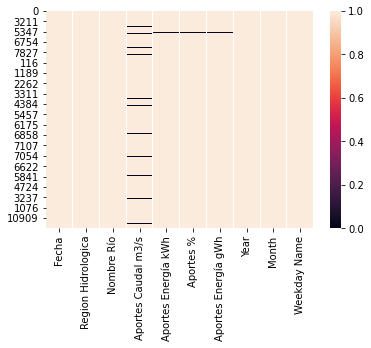

In [8]:
sns.heatmap(df_ap.notna())

In [9]:
df_ap.isnull().sum()

Fecha                     0
Region Hidrologica        0
Nombre Río                0
Aportes Caudal m3/s    8202
Aportes Energía kWh    2465
Aportes %              2522
Aportes Energía gWh    2465
Year                      0
Month                     0
Weekday Name              0
dtype: int64

In [10]:
df_ap.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Fecha,Region Hidrologica,Nombre Río,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh,Year,Month,Weekday Name
count,206490,206490,206490,198288.000000,2.040250e+05,203968.000000,204025.000000,206490.0,206490,206490
unique,7915,6,37,NaN,NaN,NaN,NaN,22.0,12,7
top,2021-06-16 00:00:00,ANTIOQUIA,"DESV. EEPPM (NEC,PAJ,DOL)",NaN,NaN,NaN,NaN,2020.0,August,Wednesday
freq,34,95305,7915,NaN,NaN,NaN,NaN,12443.0,17918,29512
first,2000-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,68.058100,5.487392e+06,97.507549,5.487392,NaN,NaN,NaN
std,NaN,NaN,NaN,124.500975,7.742166e+06,87.038224,7.742166,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,1.000000e+02,0.010753,0.000100,NaN,NaN,NaN
25%,NaN,NaN,NaN,10.416000,1.118000e+06,58.015487,1.118000,NaN,NaN,NaN


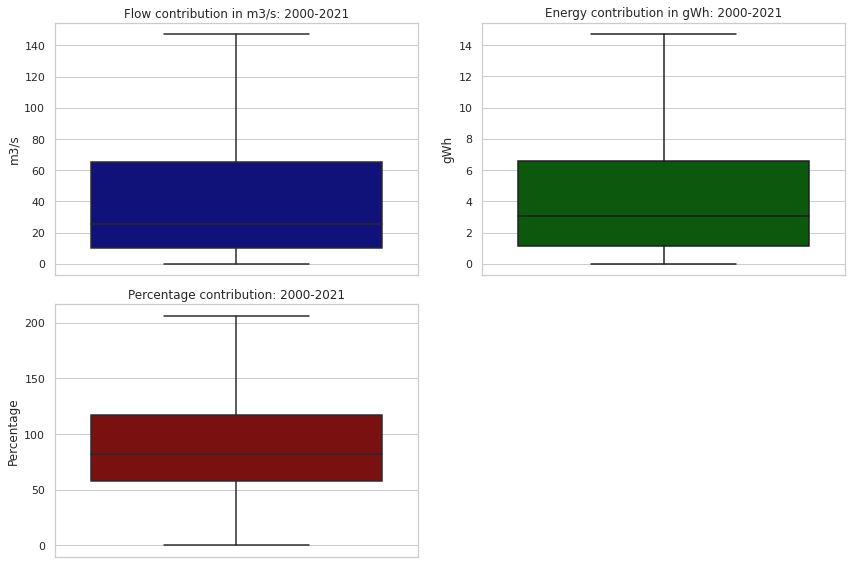

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
plt.subplot(221)

sns.boxplot(data=df_ap, y='Aportes Caudal m3/s',color="darkblue", showfliers=False)
plt.ylabel('m3/s')
plt.title("Flow contribution in m3/s: 2000-2021")

plt.subplot(222)
sns.boxplot(data=df_ap, y='Aportes Energía gWh',color="darkgreen", showfliers=False)
plt.ylabel('gWh')
plt.title("Energy contribution in gWh: 2000-2021")

plt.subplot(223)
sns.boxplot(data=df_ap, y='Aportes %',color="darkred", showfliers=False)
plt.ylabel('Percentage')
plt.title("Percentage contribution: 2000-2021")

plt.tight_layout()

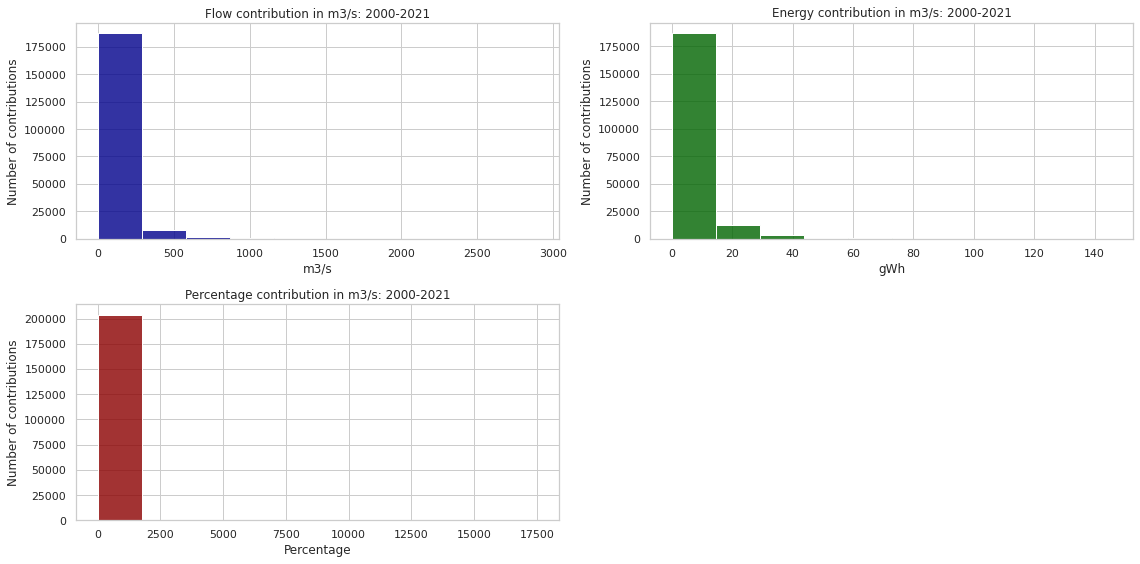

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(16,8))
plt.subplot(221)

sns.histplot(data=df_ap, x='Aportes Caudal m3/s',bins=10,color="darkblue",alpha=0.8)
plt.xlabel('m3/s')
plt.ylabel('Number of contributions')
plt.title("Flow contribution in m3/s: 2000-2021")

plt.subplot(222)
sns.histplot(data=df_ap, x='Aportes Energía gWh',bins=10, color="darkgreen",alpha=0.8)
plt.xlabel('gWh')
plt.ylabel('Number of contributions')
plt.title("Energy contribution in m3/s: 2000-2021")

plt.subplot(223)
sns.histplot(data=df_ap, x='Aportes %',bins=10, color="darkred",alpha=0.8)
plt.xlabel('Percentage')
plt.ylabel('Number of contributions')
plt.title("Percentage contribution in m3/s: 2000-2021")

plt.tight_layout()

Text(0, 0.5, 'Number of contributions')

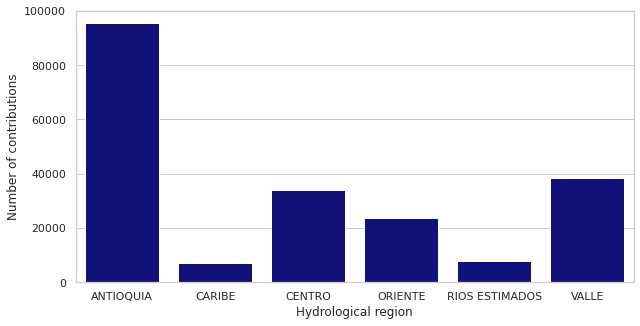

In [13]:
df_rh = df_ap.groupby(['Region Hidrologica']).size()
df_rh = df_rh.reset_index()
df_rh.columns = ['Region Hidrologica','Aportes']

# Gráfica
plt.subplots(figsize=(10, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='Region Hidrologica', y='Aportes', data = df_rh,color="darkblue")
plt.xlabel('Hydrological region')
plt.ylabel('Number of contributions')
# plt.title("Number of contributions by Hydrological Region from 2000 to 2021")

Text(0.5, 0, 'Number of contributions')

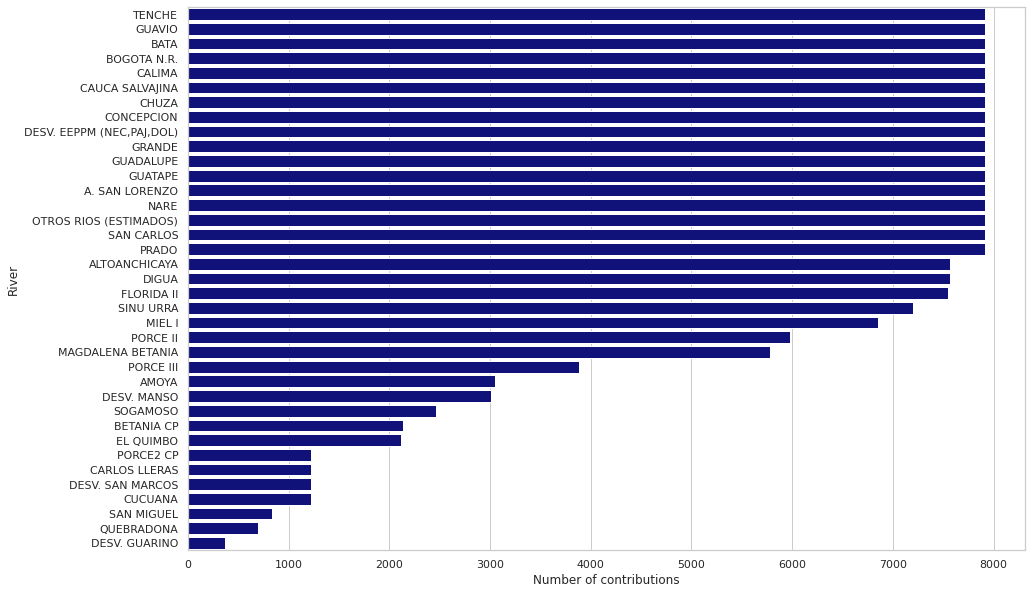

In [14]:
df_rh = df_ap.groupby(['Nombre Río']).size().sort_values(ascending=False)
df_rh = df_rh.reset_index()
df_rh.columns = ['Nombre Río','Aportes']

# Gráfica
plt.subplots(figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.barplot(x='Aportes', y='Nombre Río', data = df_rh,color="darkblue")
plt.ylabel('River')
plt.xlabel('Number of contributions')
#plt.title("Number of contributions per river from 2000 to 2021")

In [15]:
df_by_day_ac = df_ap.groupby(by=['Fecha','Region Hidrologica']).sum().reset_index()
df_temp_rg_ac = df_by_day_ac.groupby(['Region Hidrologica'])['Aportes Caudal m3/s'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_ac

,Region Hidrologica,count,sum,mean,std,min,median,max
0,CENTRO,7915,4.997736e+06,631.425935,400.458862,0.0,528.900,3616.529
1,ANTIOQUIA,7915,3.091492e+06,390.586541,193.174356,0.0,349.452,1497.701
2,CARIBE,7200,2.411564e+06,334.939403,205.838948,0.0,320.095,2539.460
3,VALLE,7915,1.735481e+06,219.264832,112.670641,0.0,196.780,1883.160
4,ORIENTE,7915,1.258831e+06,159.043711,147.232155,0.0,119.140,1270.690
5,RIOS ESTIMADOS,7915,0.000000e+00,0.000000,0.000000,0.0,0.000,0.000


In [16]:
df_by_day_ae = df_ap.groupby(by=['Fecha','Nombre Río']).sum().reset_index()
df_temp_rio_ae = df_by_day_ae.groupby(['Nombre Río'])['Aportes Caudal m3/s'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rio_ae

,Nombre Río,count,sum,mean,std,min,median,max
0,MAGDALENA BETANIA,5783,2.414801e+06,417.568975,247.515529,0.000,356.5800,2309.440
1,SINU URRA,7200,2.411564e+06,334.939403,205.838948,0.000,320.0950,2539.460
2,CAUCA SALVAJINA,7915,9.898442e+05,125.059280,78.623419,0.000,107.2400,785.160
3,SOGAMOSO,2467,9.775860e+05,396.265112,286.831642,0.000,312.5800,2893.781
4,BATA,7915,6.127000e+05,77.409986,80.199628,0.000,54.2600,791.800
5,GUAVIO,7915,5.619003e+05,70.991820,64.188899,0.000,53.7600,621.130
6,PORCE II,5980,5.529363e+05,92.464266,49.146746,11.523,78.7250,531.561
7,MIEL I,6850,5.519461e+05,80.576072,53.094704,0.000,68.5235,586.273
8,EL QUIMBO,2116,5.019825e+05,237.231811,150.005674,0.000,199.0200,1156.460
9,PRADO,7915,4.554396e+05,57.541333,69.443068,0.000,35.9100,833.780


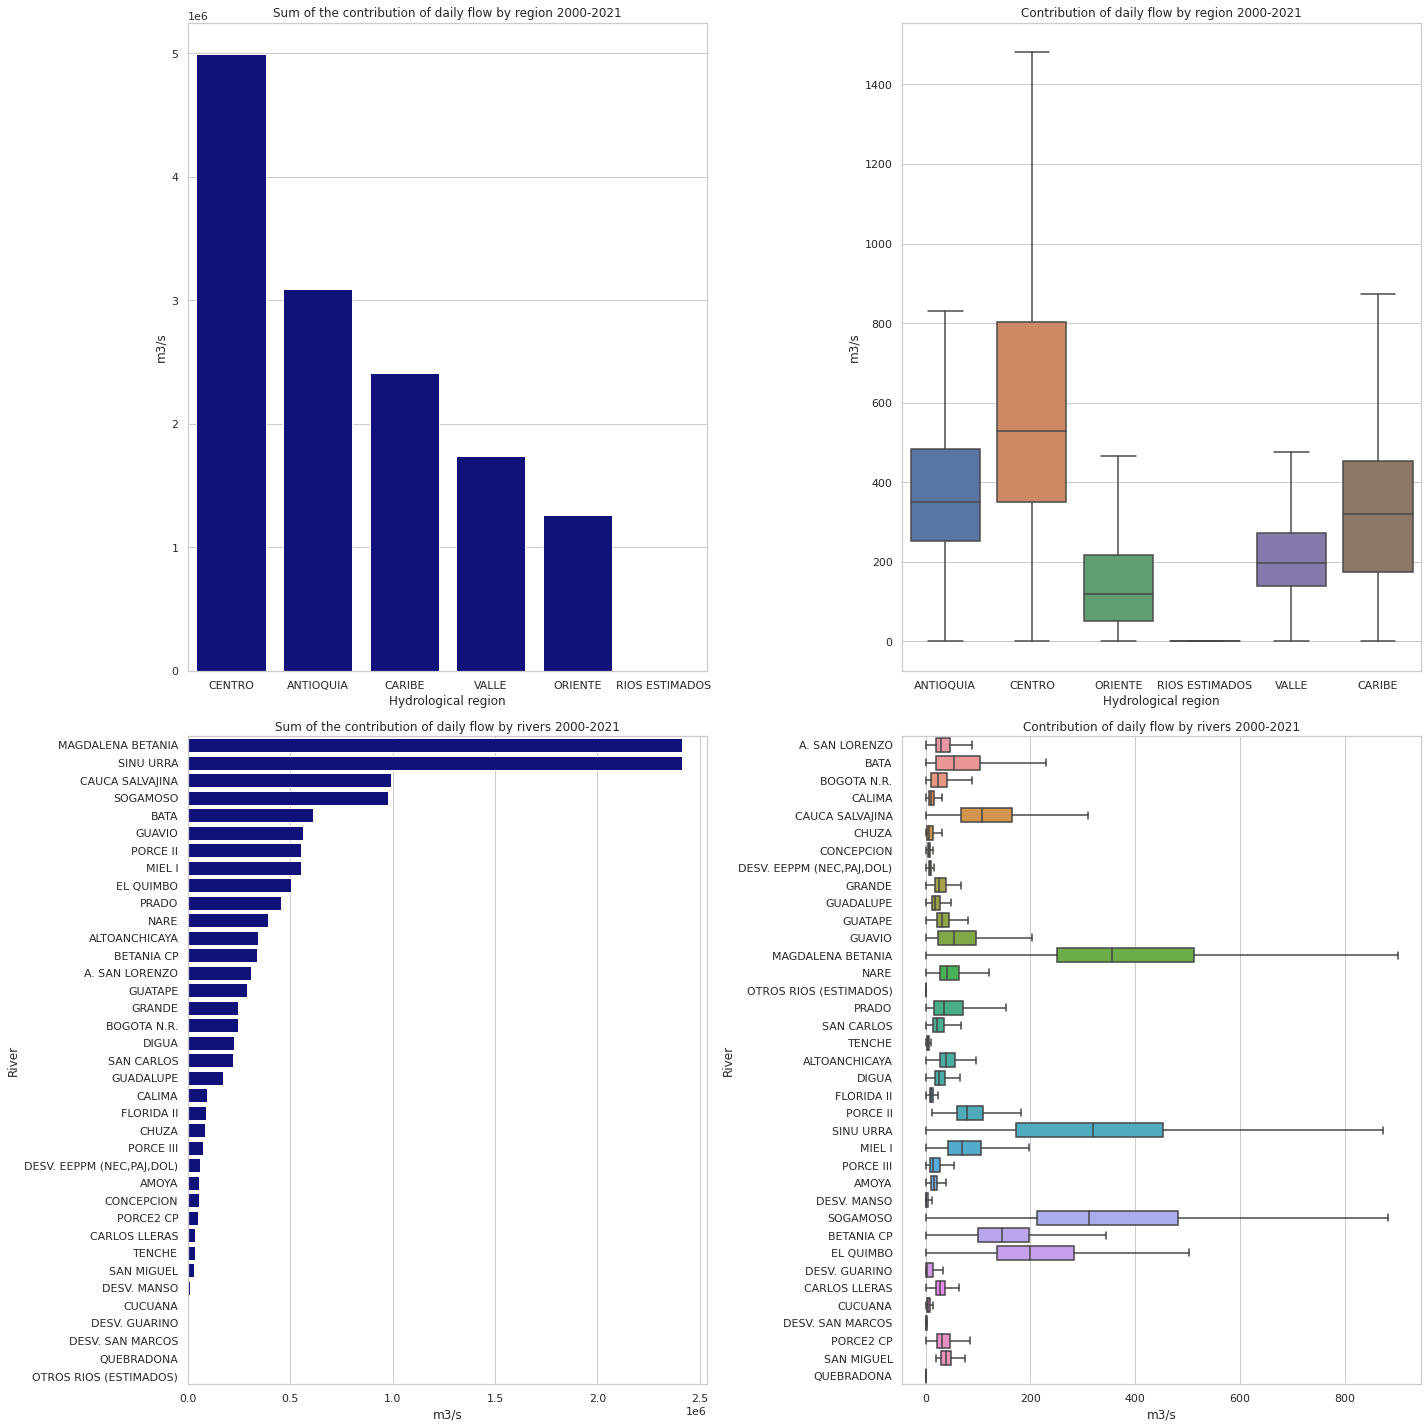

In [17]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,20))

plt.subplot(221)

sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_ac,color="darkblue")
plt.ylabel('m3/s')
plt.xlabel('Hydrological region')
plt.title("Sum of the contribution of daily flow by region 2000-2021")

plt.subplot(222)
sns.boxplot(x='Region Hidrologica', y='Aportes Caudal m3/s', data = df_by_day_ac,showfliers=False)
#sns.boxplot(x='Region Hidrologica', y='Aportes Caudal m3/s', data = r_ac,showfliers=False)
#sns.barplot(x='Region Hidrologica', y='mean', data = r_ac.sort_values(by='mean',ascending = False),color="darkblue")
plt.ylabel('m3/s')
plt.xlabel('Hydrological region')
plt.title("Contribution of daily flow by region 2000-2021")

plt.subplot(223)
sns.barplot(x='sum', y='Nombre Río', data = df_temp_rio_ae,color="darkblue")
plt.xlabel('m3/s')
plt.ylabel('River')
plt.title("Sum of the contribution of daily flow by rivers 2000-2021")

plt.subplot(224)
sns.boxplot(x='Aportes Caudal m3/s',y='Nombre Río',  data = df_by_day_ae,showfliers=False)
#sns.barplot(x='mean', y='Nombre Río', data = rio_ac.sort_values(by='mean',ascending = False),color="darkblue")
plt.xlabel('m3/s')
plt.ylabel('River')
plt.title("Contribution of daily flow by rivers 2000-2021")

plt.tight_layout()

In [18]:
df_temp_rg_ac_g = df_by_day_ac.groupby(['Region Hidrologica'])['Aportes Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_ac_g

,Region Hidrologica,count,sum,mean,std,min,median,max
0,ANTIOQUIA,7915,519583.4711,65.645416,33.825897,16.2073,57.12350,290.8370
1,ORIENTE,7915,268482.5314,33.920724,31.139056,0.6156,25.49640,268.7334
2,CENTRO,7915,204411.0206,25.825776,20.916260,0.0936,20.35620,194.3297
3,VALLE,7915,67337.2011,8.507543,4.330894,0.7097,7.62000,46.0854
4,RIOS ESTIMADOS,7915,33264.8262,4.202758,2.701016,1.0259,3.45680,31.0042
5,CARIBE,7200,26486.1152,3.678627,2.259051,0.1384,3.52855,28.6024


In [19]:
df_temp_rio_ae_g = df_by_day_ae.groupby(['Nombre Río'])['Aportes Energía gWh'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rio_ae_g

,Nombre Río,count,sum,mean,std,min,median,max
0,NARE,7915,136217.7827,17.210080,10.887292,1.9789,14.28600,109.8714
1,GUAVIO,7915,133071.5912,16.812583,15.176832,0.0000,12.72190,145.5009
2,BATA,7915,101199.7638,12.785820,13.271730,0.4460,8.93870,133.2561
3,BOGOTA N.R.,7915,100099.8037,12.646848,13.383337,0.0000,9.33130,124.8248
4,A. SAN LORENZO,7915,69484.8800,8.778886,6.843201,0.4059,6.56250,113.0278
5,GRANDE,7915,68162.3671,8.611796,5.146986,1.6695,7.17770,51.3635
6,GUATAPE,7915,47996.8514,6.064037,3.772576,0.0625,5.02560,40.9011
7,GUADALUPE,7915,43985.7693,5.557267,3.589857,0.2391,4.62380,40.7824
8,PORCE II,5980,43955.2035,7.350368,4.932778,0.5936,6.08510,64.4443
9,MAGDALENA BETANIA,5783,35939.2684,6.214641,3.682481,0.0326,5.29530,34.4088


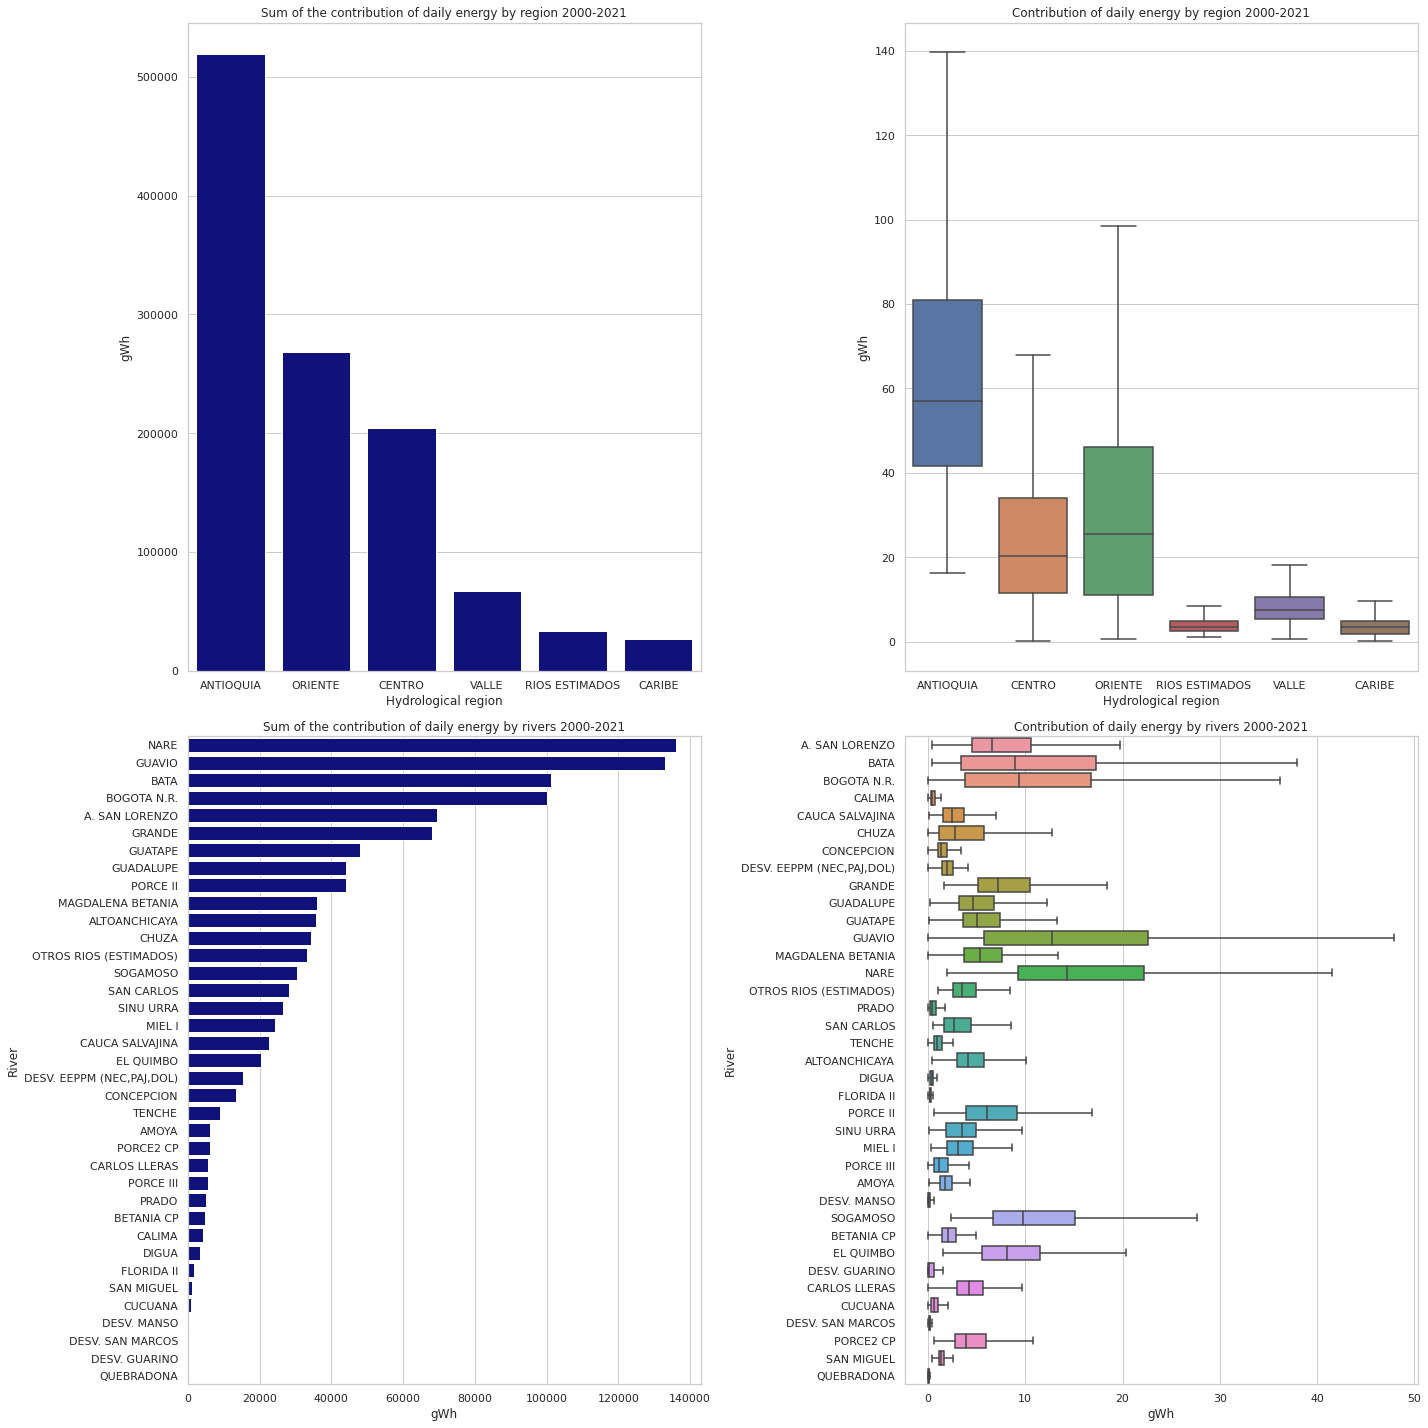

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(20,20))

plt.subplot(221)

sns.barplot(x='Region Hidrologica', y='sum', data = df_temp_rg_ac_g,color="darkblue")
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Sum of the contribution of daily energy by region 2000-2021")

plt.subplot(222)
sns.boxplot(x='Region Hidrologica', y='Aportes Energía gWh', data = df_by_day_ac,showfliers=False)
#sns.boxplot(x='Region Hidrologica', y='Aportes Caudal m3/s', data = r_ac,showfliers=False)
#sns.barplot(x='Region Hidrologica', y='mean', data = r_ac.sort_values(by='mean',ascending = False),color="darkblue")
plt.ylabel('gWh')
plt.xlabel('Hydrological region')
plt.title("Contribution of daily energy by region 2000-2021")

plt.subplot(223)
sns.barplot(x='sum', y='Nombre Río', data = df_temp_rio_ae_g,color="darkblue")
plt.xlabel('gWh')
plt.ylabel('River')
plt.title("Sum of the contribution of daily energy by rivers 2000-2021")

plt.subplot(224)
sns.boxplot(x='Aportes Energía gWh',y='Nombre Río',  data = df_by_day_ae,showfliers=False)
#sns.barplot(x='mean', y='Nombre Río', data = rio_ac.sort_values(by='mean',ascending = False),color="darkblue")
plt.xlabel('gWh')
plt.ylabel('River')
plt.title("Contribution of daily energy by rivers 2000-2021")

plt.tight_layout()

In [21]:
df_by_day_ac['Fecha'] = pd.to_datetime(df_by_day_ac['Fecha'])
# creando las columnas dias, meses y años
df_by_day_ac['Year'] = df_by_day_ac['Fecha'].dt.year
df_by_day_ac['Month'] = df_by_day_ac['Fecha'].dt.month_name()
df_by_day_ac['Weekday Name'] = df_by_day_ac['Fecha'].dt.day_name()

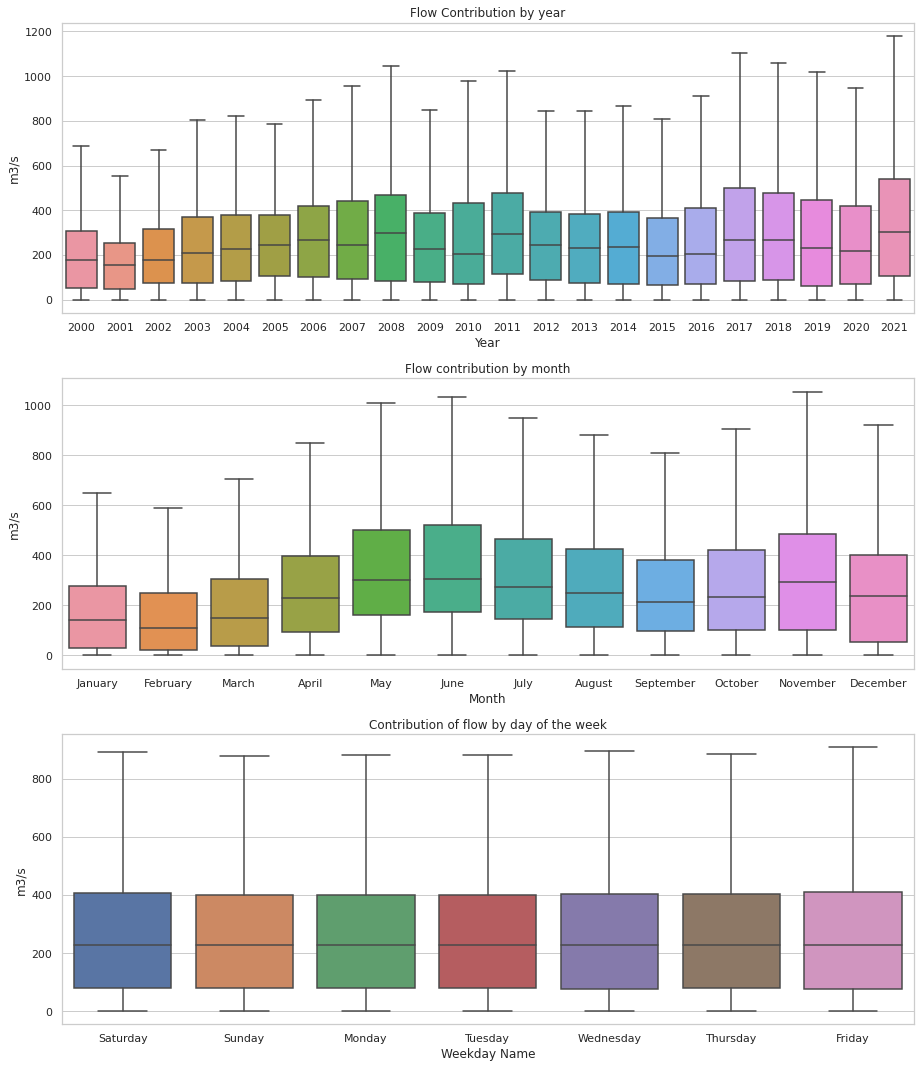

In [24]:
sns.set(style="whitegrid")

plt.subplots(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Aportes Caudal m3/s', data = df_by_day_ac,showfliers=False)
#sns.barplot(x="Year", y='Aportes Caudal m3/s' data = df_ap)
plt.ylabel("m3/s")
plt.title("Flow Contribution by year")
#plt.show()
#fig.savefig('flowcontrib.jpg')

plt.subplot(323)
sns.boxplot(x="Month",y='Aportes Caudal m3/s',  data = df_by_day_ac,showfliers=False)
#sns.barplot(x="Month", y='Aportes Caudal m3/s', data = df_ap)
plt.ylabel("m3/s")
plt.title("Flow contribution by month")
#fig.savefig('flowcontribmonth.jpg')
#plt.tight_layout()

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Aportes Caudal m3/s',  data = df_by_day_ac,showfliers=False)
plt.ylabel("m3/s")
#sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s', data = df_ap)
plt.title("Contribution of flow by day of the week")

plt.tight_layout()


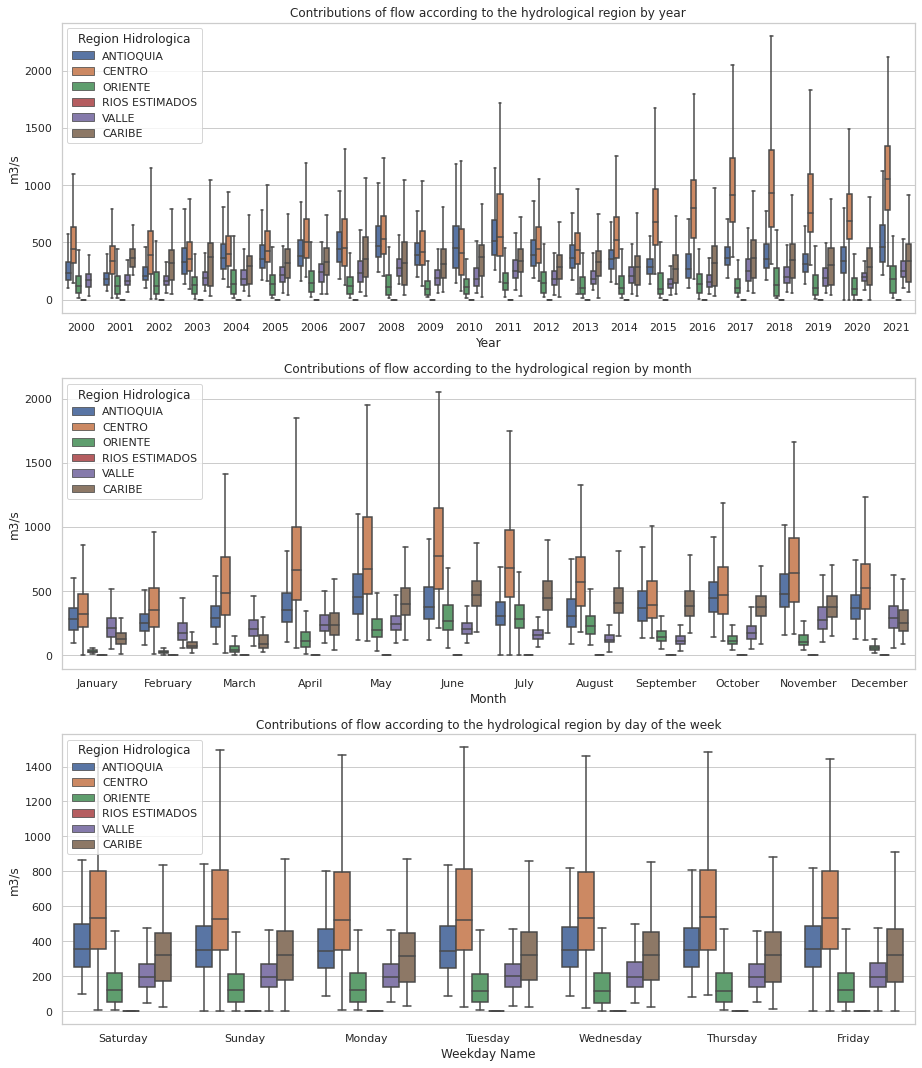

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year",y='Aportes Caudal m3/s',hue='Region Hidrologica',  data = df_by_day_ac, showfliers=False)
#sns.barplot(x="Year", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("m3/s")
plt.title("Contributions of flow according to the hydrological region by year")

plt.subplot(323)
sns.boxplot(x="Month",y='Aportes Caudal m3/s',hue='Region Hidrologica',  data = df_by_day_ac, showfliers=False)
#sns.barplot(x="Month", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("m3/s")
plt.title("Contributions of flow according to the hydrological region by month")
plt.tight_layout()

plt.subplot(325)
sns.boxplot(x="Weekday Name",y='Aportes Caudal m3/s',hue='Region Hidrologica',  data = df_by_day_ac,showfliers=False)
#sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = df_ap)
plt.ylabel("m3/s")
plt.title("Contributions of flow according to the hydrological region by day of the week")

plt.tight_layout()

In [28]:
df_by_day_ac_g = df_ap.groupby(by=['Fecha','Region Hidrologica']).sum().reset_index()
df_temp_rg_ac_g = df_by_day_ac_g.groupby(['Region Hidrologica'])['Aportes Caudal m3/s'].agg(['count','sum',np.mean, np.std,'min', np.median, 'max']).sort_values(by='sum',ascending = False).reset_index()
df_temp_rg_ac_g

,Region Hidrologica,count,sum,mean,std,min,median,max
0,CENTRO,7915,4.997736e+06,631.425935,400.458862,0.0,528.900,3616.529
1,ANTIOQUIA,7915,3.091492e+06,390.586541,193.174356,0.0,349.452,1497.701
2,CARIBE,7200,2.411564e+06,334.939403,205.838948,0.0,320.095,2539.460
3,VALLE,7915,1.735481e+06,219.264832,112.670641,0.0,196.780,1883.160
4,ORIENTE,7915,1.258831e+06,159.043711,147.232155,0.0,119.140,1270.690
5,RIOS ESTIMADOS,7915,0.000000e+00,0.000000,0.000000,0.0,0.000,0.000


In [29]:
df_by_day_ac_g['Fecha'] = pd.to_datetime(df_by_day_ac_g['Fecha'])
# creando las columnas dias, meses y años
df_by_day_ac_g['Year'] = df_by_day_ac_g['Fecha'].dt.year
df_by_day_ac_g['Month'] = df_by_day_ac_g['Fecha'].dt.month_name()
df_by_day_ac_g['Weekday Name'] = df_by_day_ac_g['Fecha'].dt.day_name()

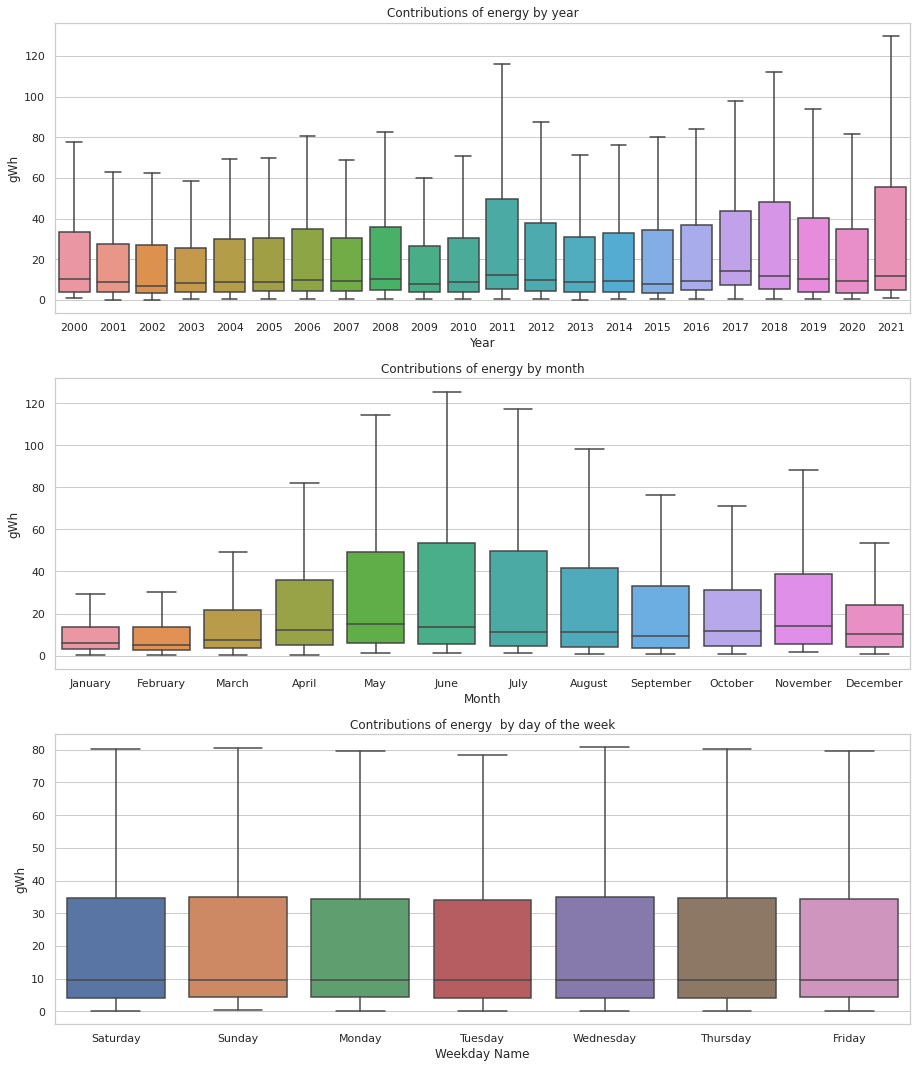

In [30]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year", y='Aportes Energía gWh', data = df_by_day_ac,showfliers=False)
plt.ylabel("gWh")
plt.title("Contributions of energy by year")

plt.subplot(323)
sns.boxplot(x="Month", y='Aportes Energía gWh', data = df_by_day_ac,showfliers=False)
plt.ylabel("gWh")
plt.title("Contributions of energy by month")

plt.subplot(325)
sns.boxplot(x="Weekday Name", y='Aportes Energía gWh', data = df_by_day_ac,showfliers=False)
plt.ylabel("gWh")
plt.title("Contributions of energy  by day of the week")

plt.tight_layout()

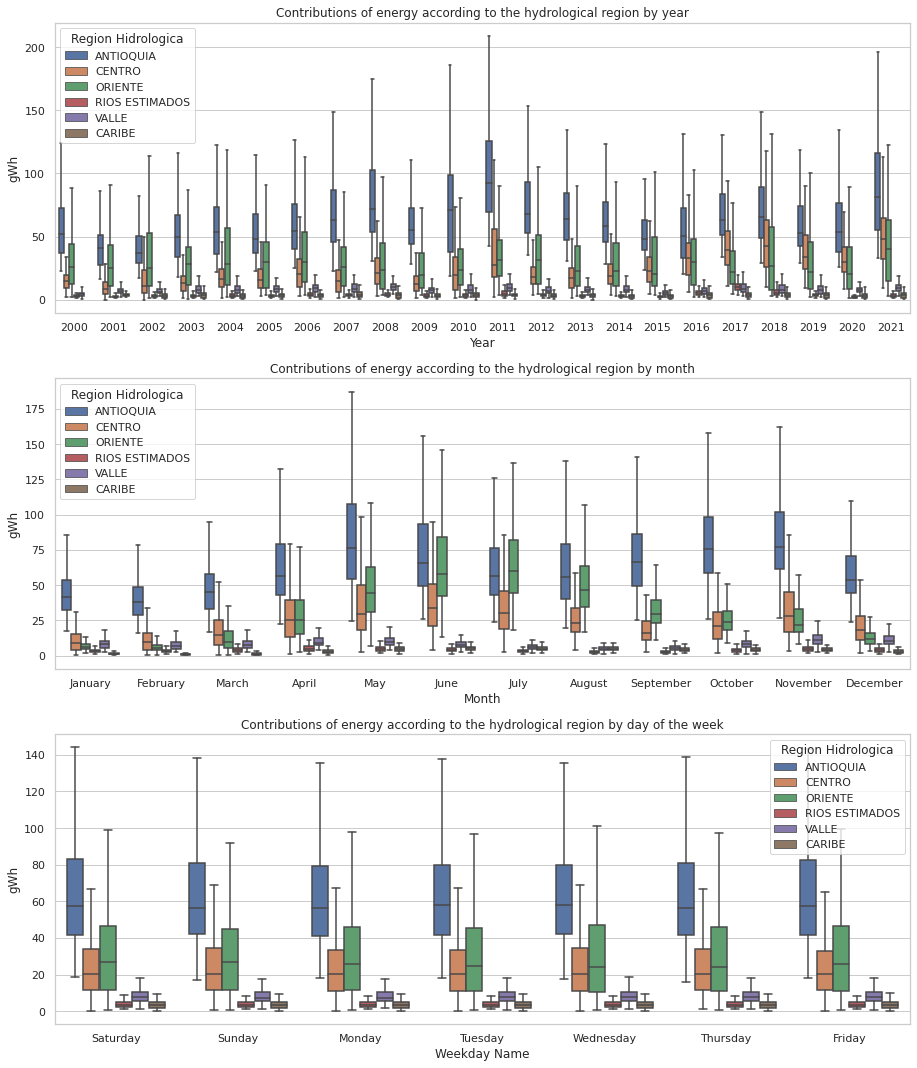

In [31]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.boxplot(x="Year", y='Aportes Energía gWh',hue='Region Hidrologica', data = df_by_day_ac,showfliers=False)
plt.ylabel("gWh")
plt.title("Contributions of energy according to the hydrological region by year")

plt.subplot(323)
sns.boxplot(x="Month", y='Aportes Energía gWh',hue='Region Hidrologica', data = df_by_day_ac,showfliers=False)
plt.ylabel("gWh")
plt.title("Contributions of energy according to the hydrological region by month")

plt.subplot(325)
sns.boxplot(x="Weekday Name", y='Aportes Energía gWh',hue='Region Hidrologica', data = df_by_day_ac,showfliers=False)
plt.ylabel("gWh")
plt.title("Contributions of energy according to the hydrological region by day of the week")

plt.tight_layout()

In [32]:
df_y = df_by_day_ac.groupby(by=['Year']).sum().reset_index()
df_m = df_by_day_ac.groupby(by=['Month']).sum().reset_index()
df_d = df_by_day_ac.groupby(by=['Weekday Name']).sum().reset_index()

y_rg_y = df_by_day_ac.groupby(by=['Year','Region Hidrologica']).sum().reset_index()
y_rg_m = df_by_day_ac.groupby(by=['Month','Region Hidrologica']).sum().reset_index()
y_rg_d = df_by_day_ac.groupby(by=['Weekday Name','Region Hidrologica']).sum().reset_index()

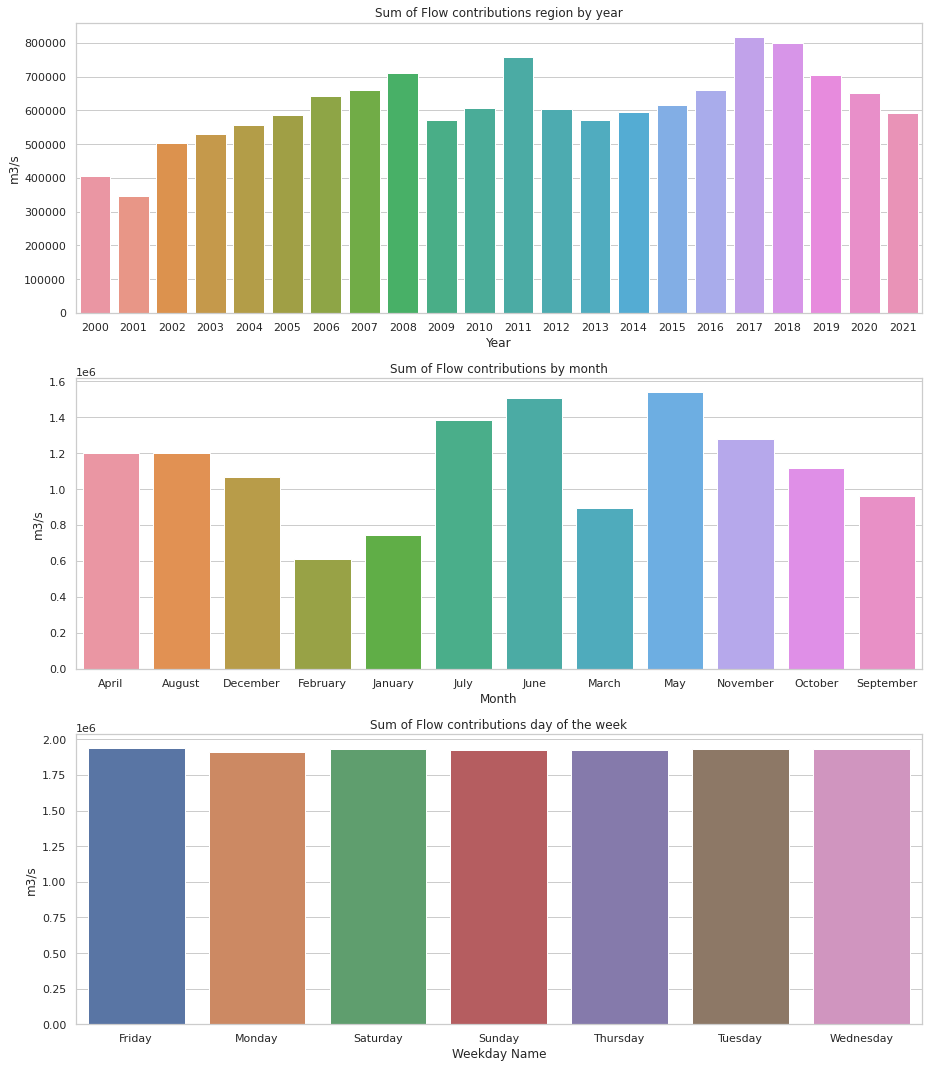

In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Aportes Caudal m3/s', data = df_y)
plt.ylabel("m3/s")
plt.title("Sum of Flow contributions region by year")

plt.subplot(323)
sns.barplot(x="Month", y='Aportes Caudal m3/s', data = df_m)
plt.ylabel("m3/s")
plt.title("Sum of Flow contributions by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s', data = df_d)
plt.ylabel("m3/s")
plt.title("Sum of Flow contributions day of the week")

plt.tight_layout()

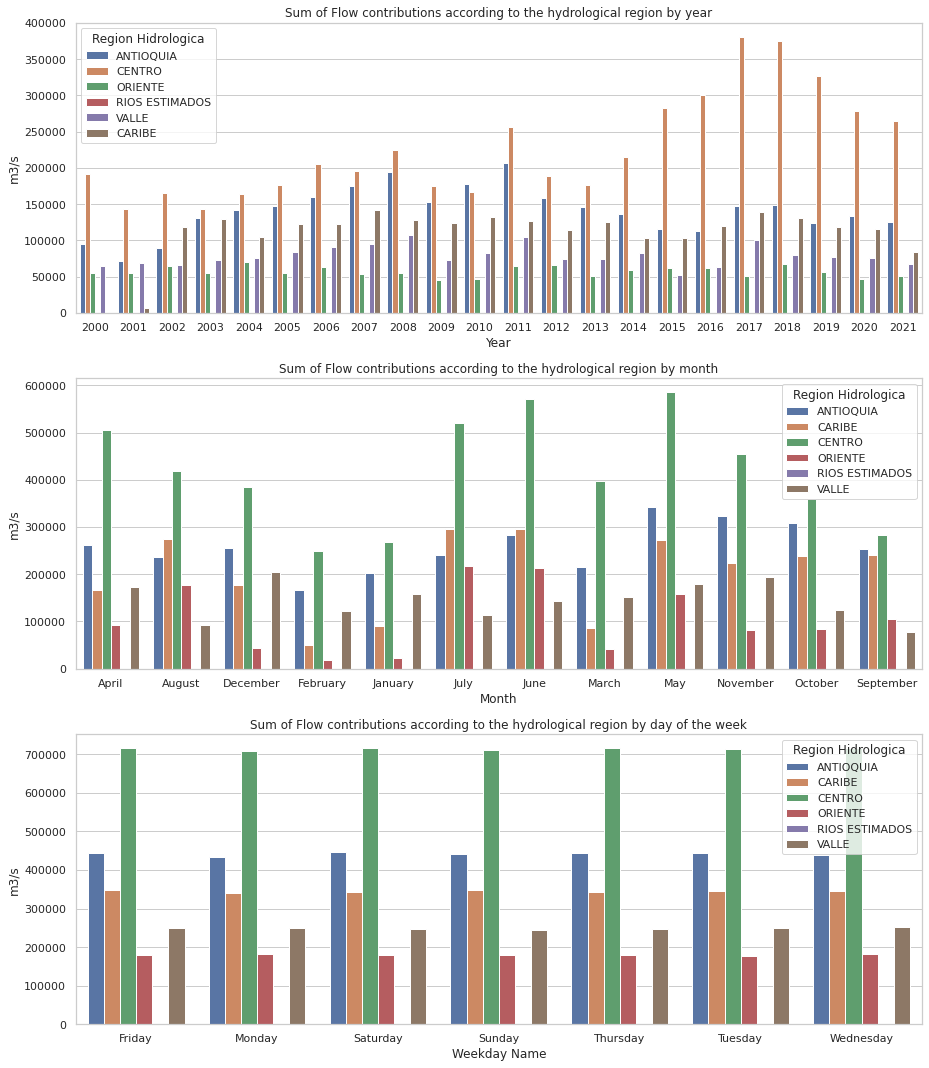

In [34]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = y_rg_y)
plt.ylabel("m3/s")
plt.title("Sum of Flow contributions according to the hydrological region by year")

plt.subplot(323)
sns.barplot(x="Month", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = y_rg_m)
plt.ylabel("m3/s")
plt.title("Sum of Flow contributions according to the hydrological region by month")
plt.tight_layout()

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Aportes Caudal m3/s',hue='Region Hidrologica', data = y_rg_d)
plt.ylabel("m3/s")
plt.title("Sum of Flow contributions according to the hydrological region by day of the week")

plt.tight_layout()

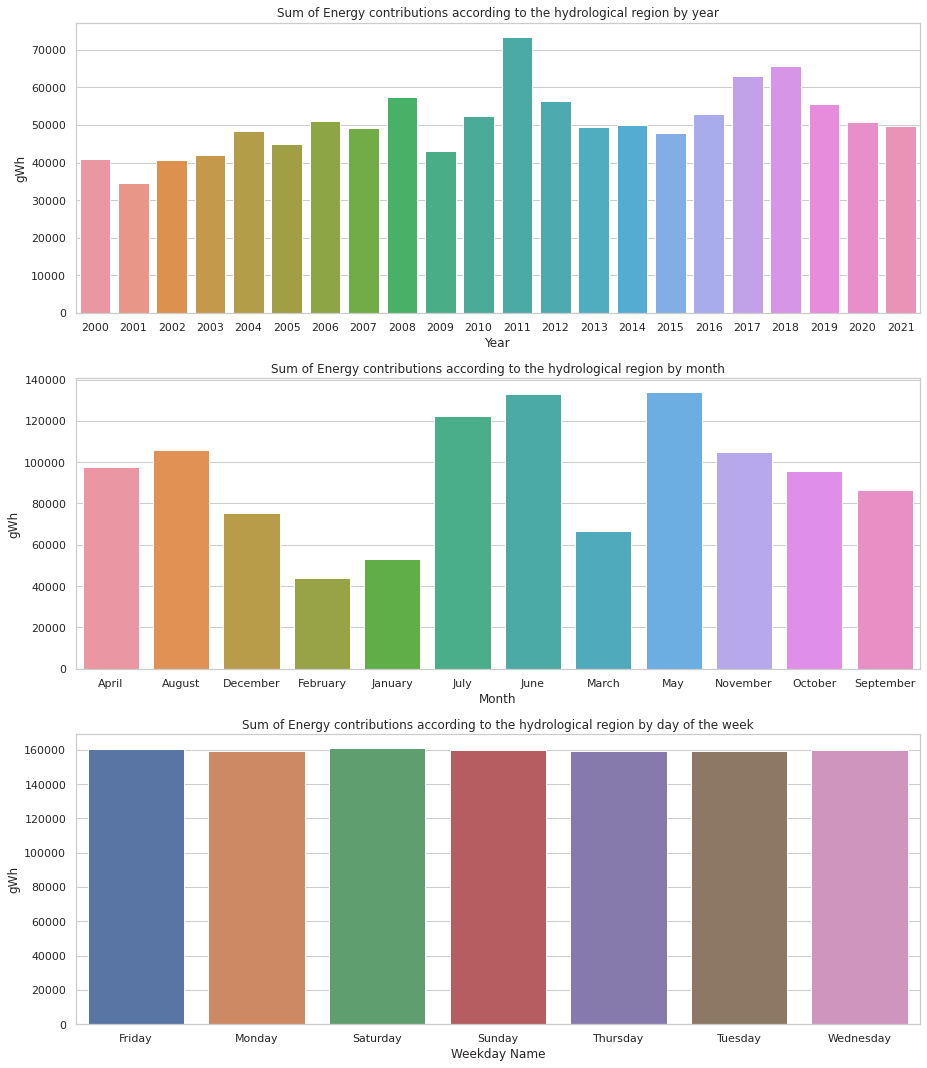

In [35]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Aportes Energía gWh', data = df_y)
plt.ylabel("gWh")
plt.title("Sum of Energy contributions according to the hydrological region by year")

plt.subplot(323)
sns.barplot(x="Month", y='Aportes Energía gWh', data = df_m)
plt.ylabel("gWh")
plt.title("Sum of Energy contributions according to the hydrological region by month")

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Aportes Energía gWh', data = df_d)
plt.ylabel("gWh")
plt.title("Sum of Energy contributions according to the hydrological region by day of the week")

plt.tight_layout()

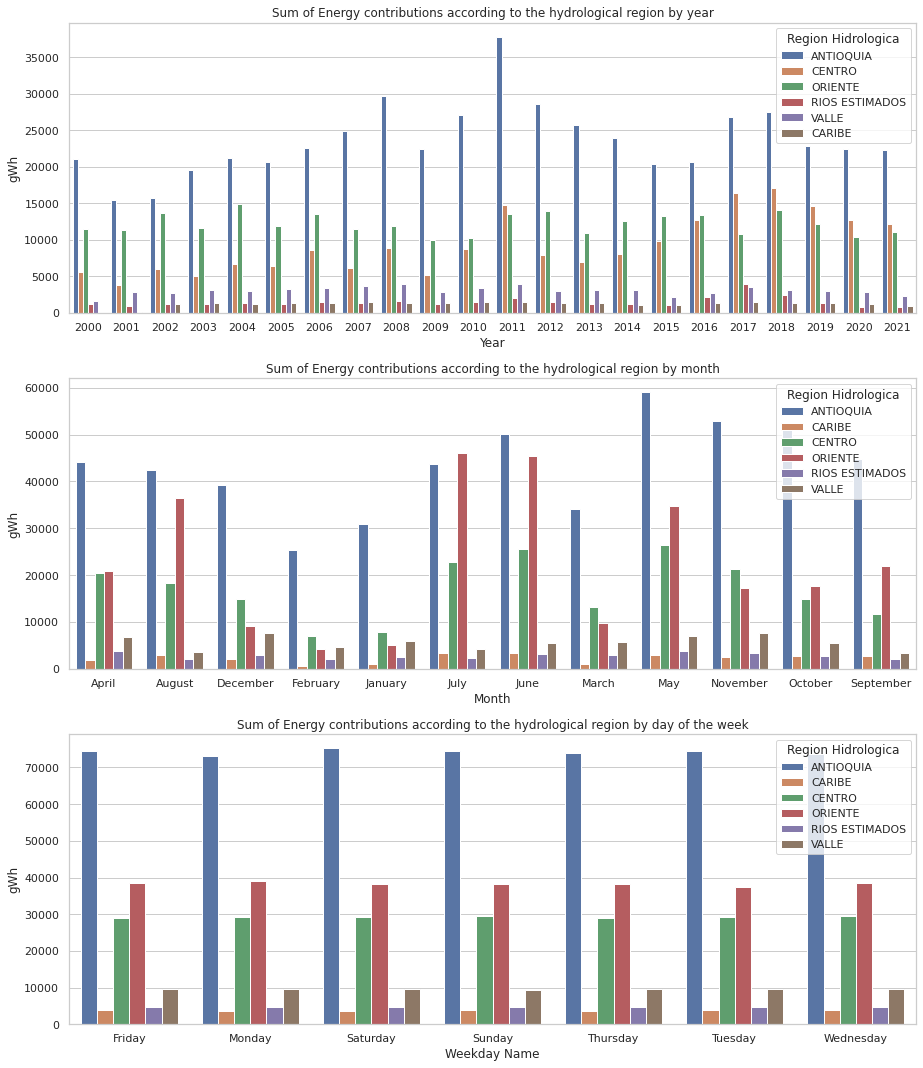

In [36]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(321)
sns.barplot(x="Year", y='Aportes Energía gWh',hue='Region Hidrologica', data = y_rg_y)
plt.ylabel("gWh")
plt.title("Sum of Energy contributions according to the hydrological region by year")

plt.subplot(323)
sns.barplot(x="Month", y='Aportes Energía gWh',hue='Region Hidrologica', data = y_rg_m)
plt.ylabel("gWh")
plt.title("Sum of Energy contributions according to the hydrological region by month")

plt.subplot(325)
sns.barplot(x="Weekday Name", y='Aportes Energía gWh',hue='Region Hidrologica', data = y_rg_d)
plt.ylabel("gWh")
plt.title("Sum of Energy contributions according to the hydrological region by day of the week")

plt.tight_layout()

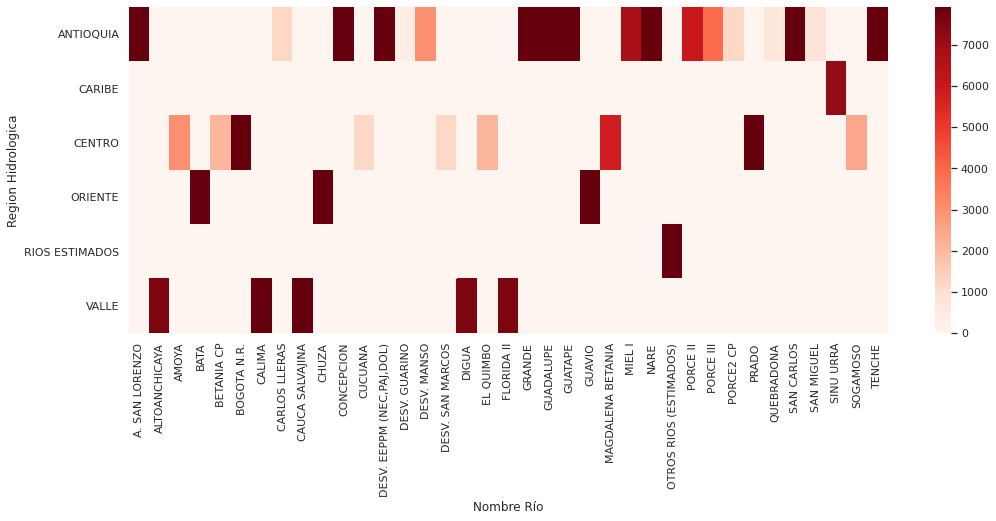

In [37]:
# tabla de contingencia entre la region hidrologica y los rios
my_contingency_table = pd.crosstab(index=df_ap['Region Hidrologica'], columns=df_ap['Nombre Río'])
plt.subplots(figsize=(17,6))
sns.heatmap(my_contingency_table, cmap="Reds")

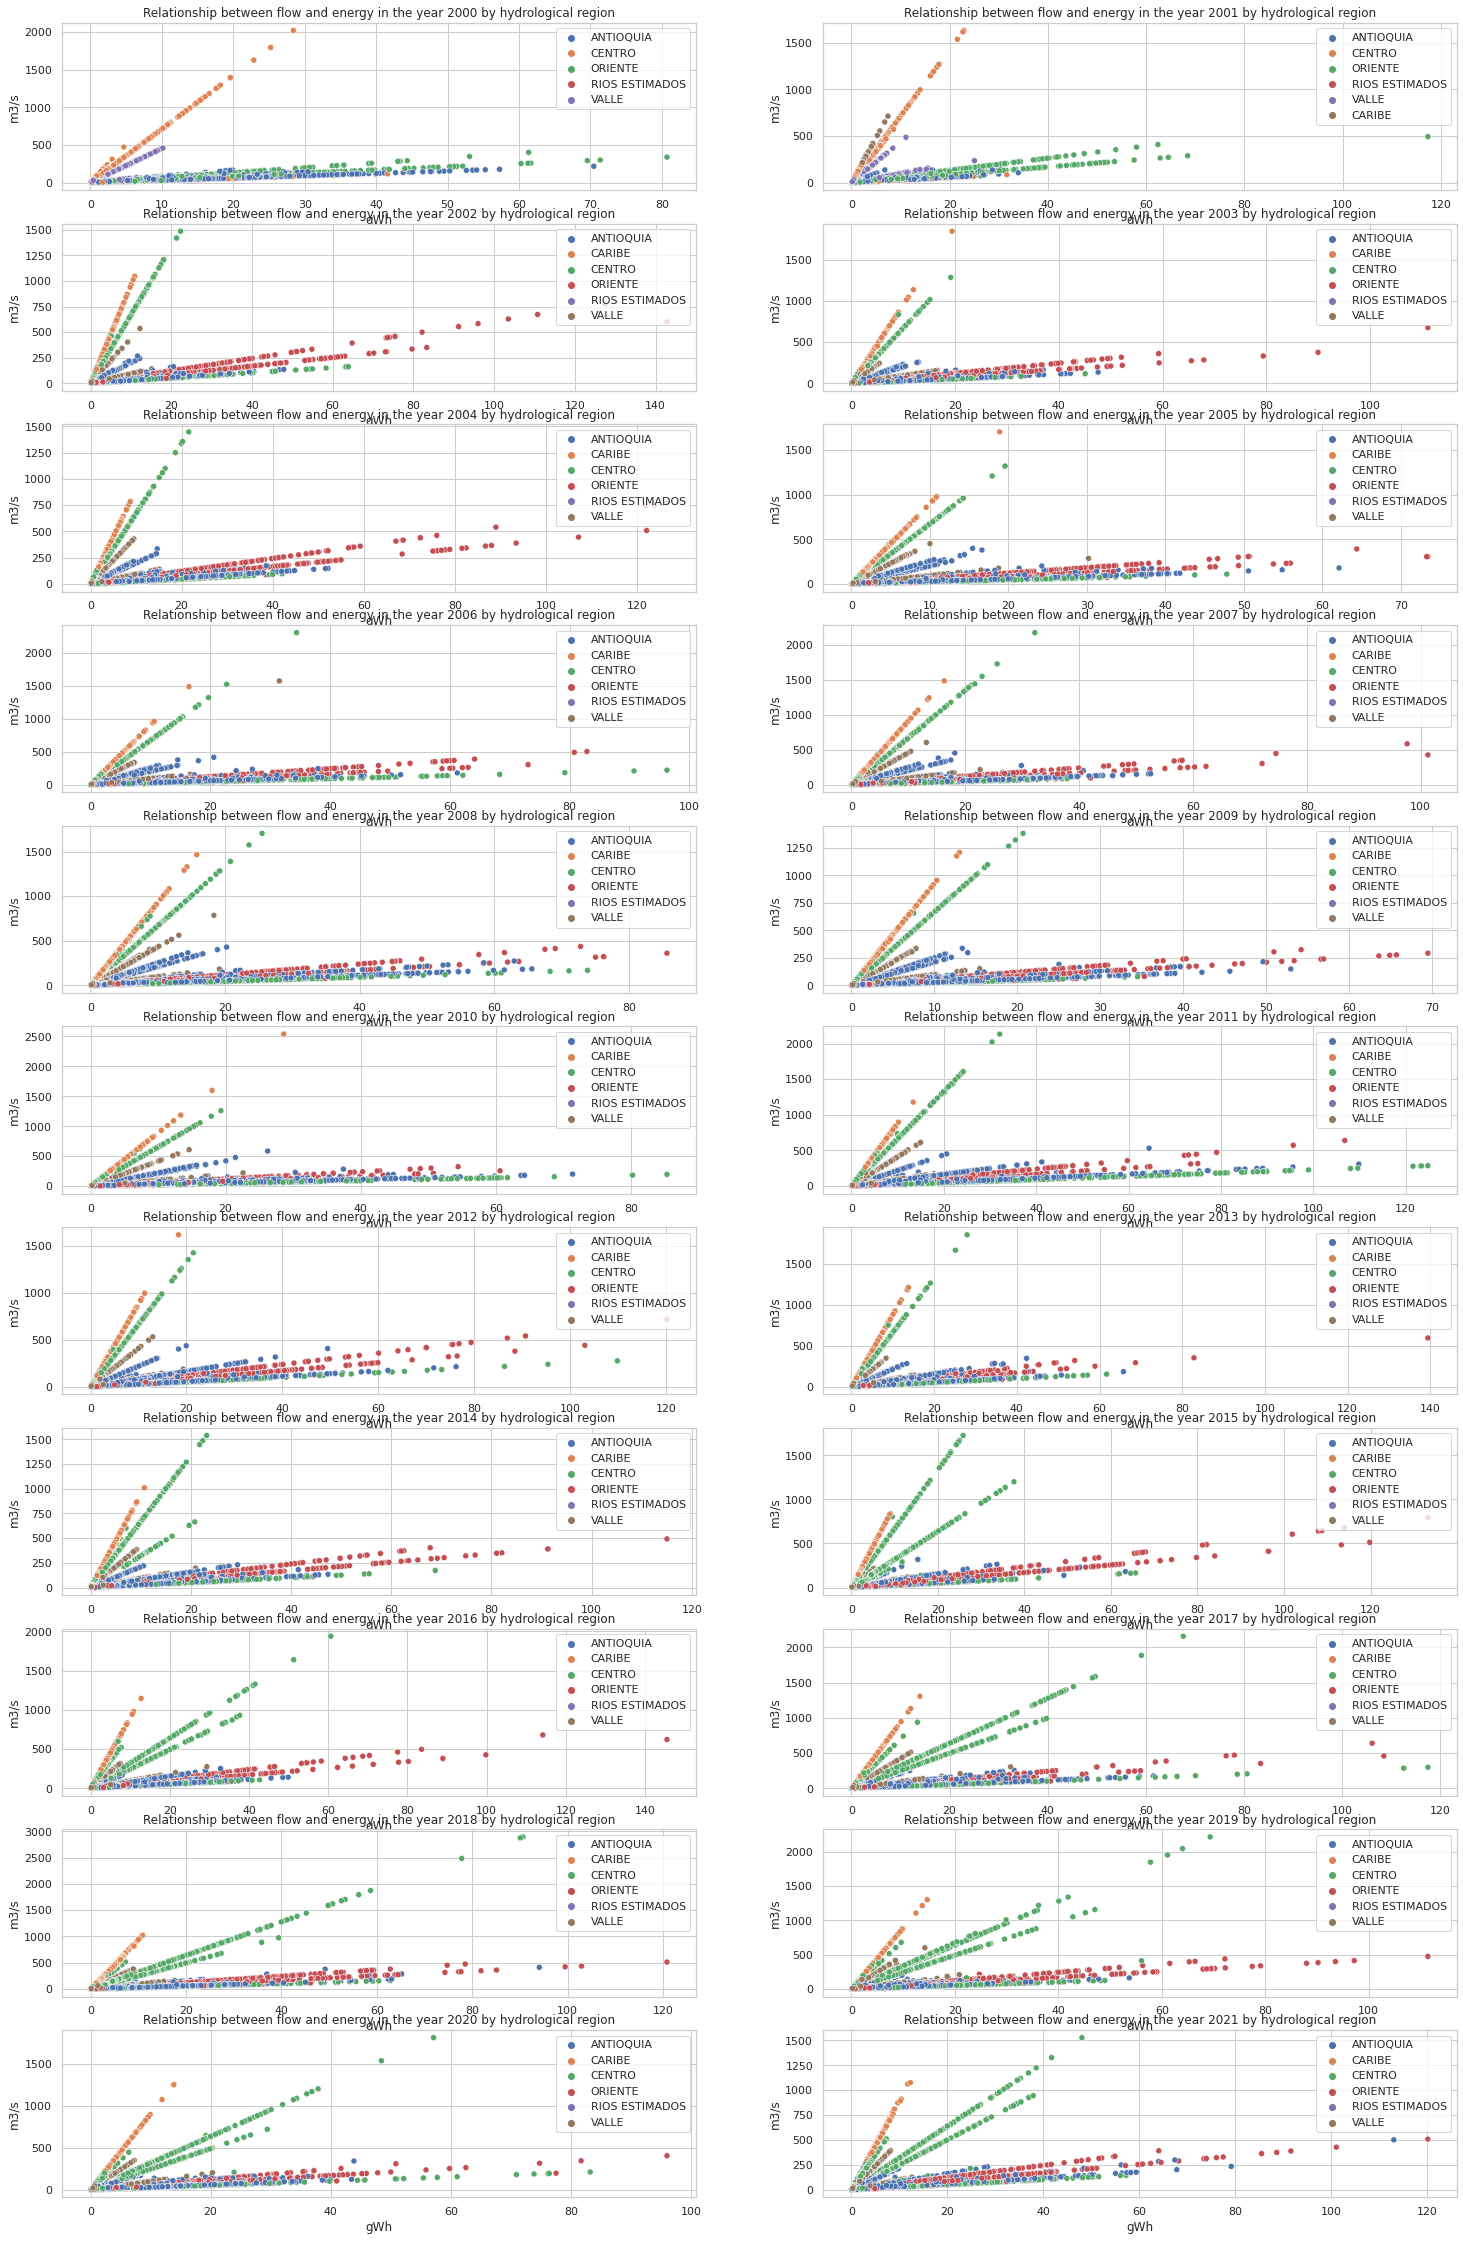

In [38]:
plt.figure(figsize=(25,40))
for i,var in enumerate(list(set(df_ap['Year']))):
    plt.subplot(11,2,i+1)
    df_temp = df_ap[df_ap['Year']==var]
    sns.scatterplot(x='Aportes Energía gWh', y='Aportes Caudal m3/s',hue='Region Hidrologica', data=df_temp)
    plt.xlabel("gWh")
    plt.ylabel("m3/s")
    plt.title("Relationship between flow and energy in the year " + str(var) + " by hydrological region")
    plt.legend(loc = 'upper right')

In [39]:
df_ap_temp_2=df_ap.groupby(["Fecha"]).sum().reset_index()
df_ap_temp_2.head(2)

,Fecha,Aportes Caudal m3/s,Aportes Energía kWh,Aportes %,Aportes Energía gWh
0,2000-01-01,719.10,56677300.0,1802.351174,56.6773
1,2000-01-02,768.34,54645200.0,1761.781853,54.6452


Text(0.5, 1.0, 'Time serie of the energy contribution')

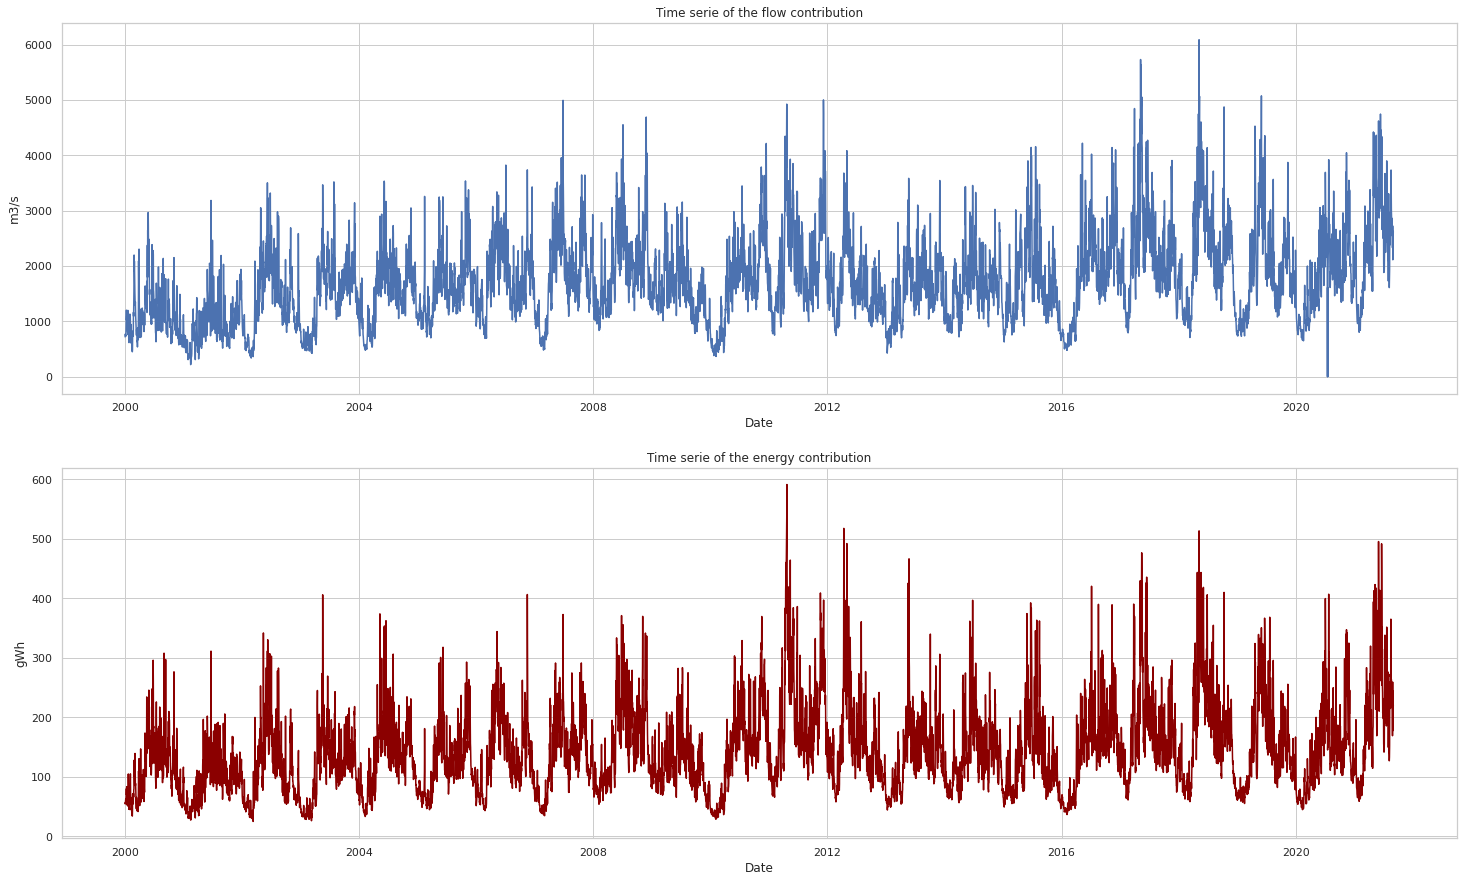

In [40]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(211)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_ap_temp_2)
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution")

plt.subplot(212)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_ap_temp_2,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution")

In [41]:
#df_vert_temp=df_by_day_vv.set_index('Fecha', inplace = True) 
#df_vert_temp
#df_by_day_vv.head(5)
df_Valle_ap = df_by_day_ac[df_by_day_ac['Region Hidrologica'] == 'VALLE']
df_Centro_ap = df_by_day_ac[df_by_day_ac['Region Hidrologica'] == 'CENTRO']
df_Oriente_ap = df_by_day_ac[df_by_day_ac['Region Hidrologica'] == 'ORIENTE']
df_Caribe_ap = df_by_day_ac[df_by_day_ac['Region Hidrologica'] == 'CARIBE']
df_Antioquia_ap = df_by_day_ac[df_by_day_ac['Region Hidrologica'] == 'ANTIOQUIA']
df_rio_ap = df_by_day_ac[df_by_day_ac['Region Hidrologica'] == 'RIOS ESTIMADOS']

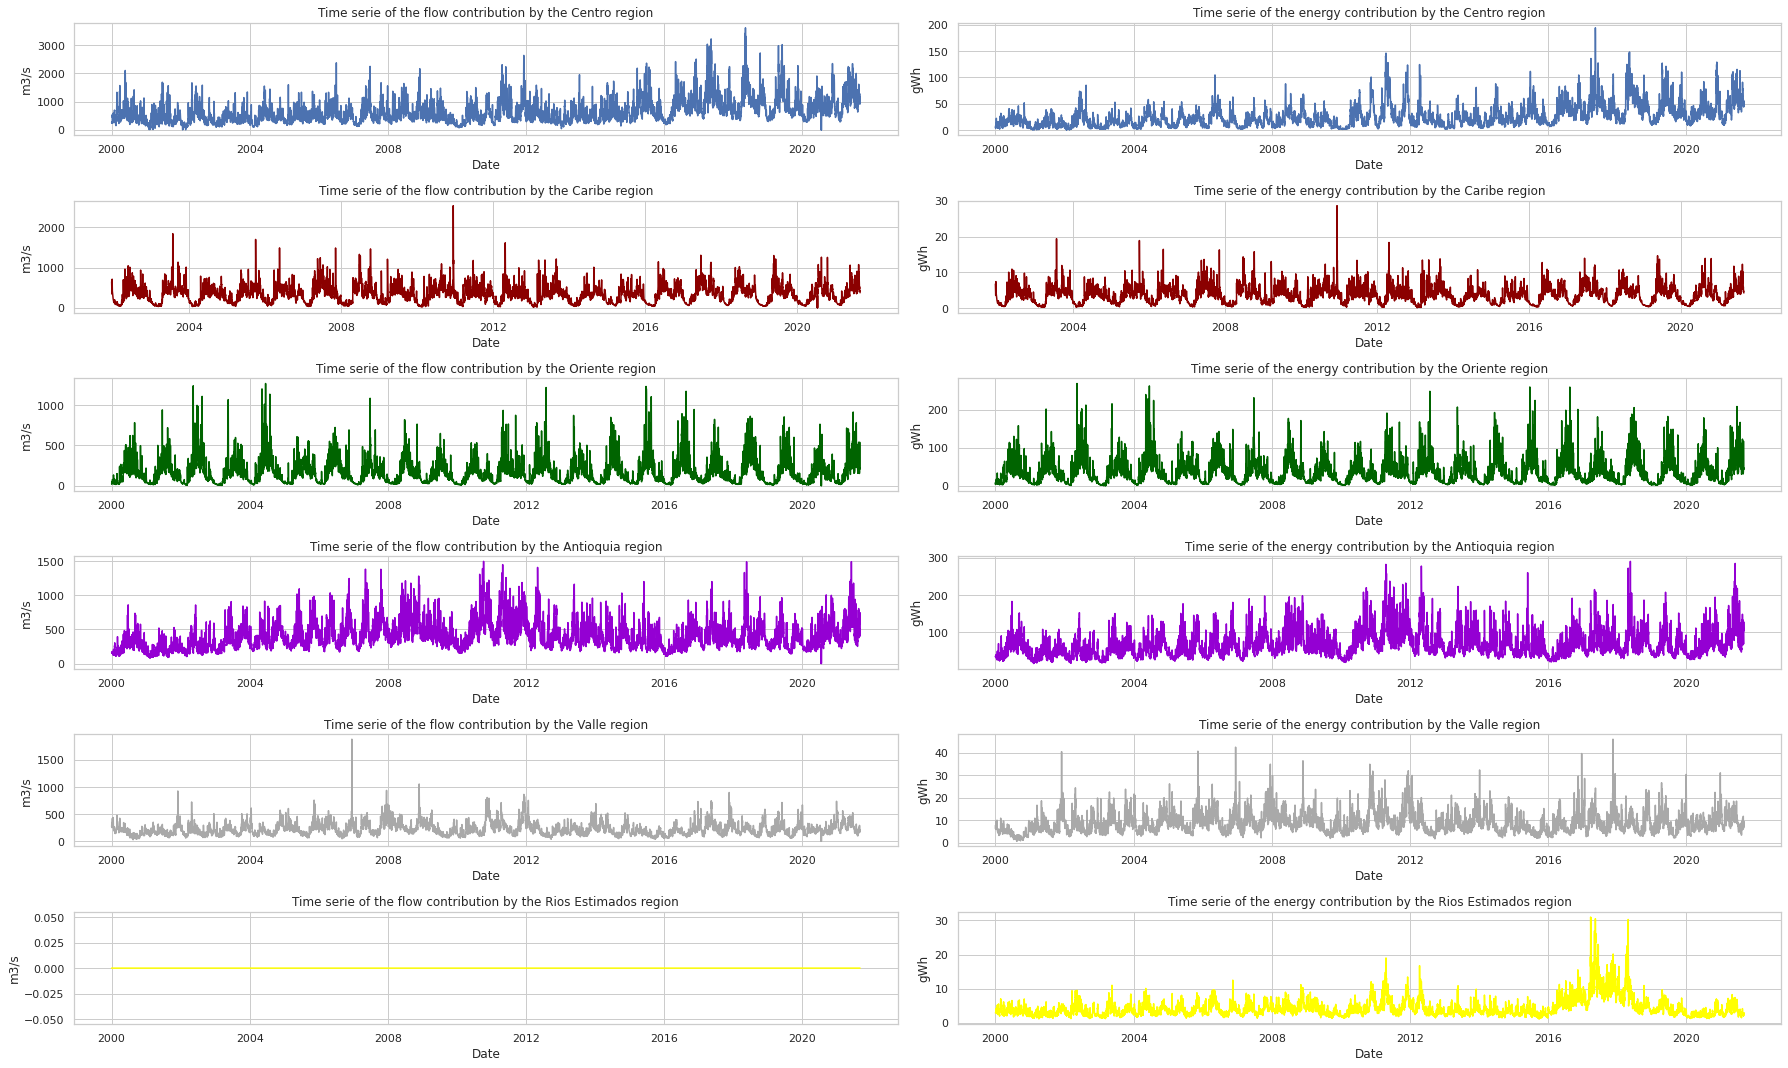

In [43]:
sns.set(style="whitegrid")

plt.figure(figsize=(25,15))

plt.subplot(621)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_Centro_ap)
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution by the Centro region")

plt.subplot(622)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_Centro_ap)
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution by the Centro region")

plt.subplot(623)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_Caribe_ap,color="darkred")
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution by the Caribe region")

plt.subplot(624)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_Caribe_ap,color="darkred")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution by the Caribe region")

plt.subplot(625)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_Oriente_ap,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution by the Oriente region")

plt.subplot(626)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_Oriente_ap,color="darkgreen")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution by the Oriente region")

plt.subplot(627)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_Antioquia_ap, color="darkviolet")
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution by the Antioquia region")

plt.subplot(628)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_Antioquia_ap,color="darkviolet")
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution by the Antioquia region")

plt.subplot(629)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_Valle_ap, color='darkgray' )
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution by the Valle region")

plt.subplot(6,2,10)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_Valle_ap,color='darkgray')
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution by the Valle region")

plt.subplot(6,2,11)
sns.lineplot(x="Fecha", y="Aportes Caudal m3/s", data=df_rio_ap, color='yellow' )
plt.xlabel("Date")
plt.ylabel("m3/s")
plt.title("Time serie of the flow contribution by the Rios Estimados region")

plt.subplot(6,2,12)
sns.lineplot(x="Fecha", y='Aportes Energía gWh', data=df_rio_ap,color='yellow')
plt.xlabel("Date")
plt.ylabel("gWh")
plt.title("Time serie of the energy contribution by the Rios Estimados region")
plt.tight_layout()

In [ ]:
# correlación entre aportes del caudal en m3 y aporte en energia entre los años 2000 y 2019
temp_aportes_diario.loc[:,['Aportes Caudal m3/s','Aportes Energía kWh']].corr()

,Aportes Caudal m3/s,Aportes Energía kWh
Aportes Caudal m3/s,1.000000,0.314341
Aportes Energía kWh,0.314341,1.000000
